In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df['Class'].value_counts(normalize=True)*100

DERMASON    26.052458
SIRA        19.366689
SEKER       14.892366
HOROZ       14.165014
CALI        11.975608
BARBUNYA     9.712732
BOMBAY       3.835133
Name: Class, dtype: float64

In [5]:
df.shape

(13611, 17)

In [6]:
(df.isna().sum() / df.shape[0]).sort_values()

Area               0.0
ShapeFactor3       0.0
ShapeFactor2       0.0
ShapeFactor1       0.0
Compactness        0.0
roundness          0.0
Solidity           0.0
ShapeFactor4       0.0
Extent             0.0
ConvexArea         0.0
Eccentricity       0.0
AspectRation       0.0
MinorAxisLength    0.0
MajorAxisLength    0.0
Perimeter          0.0
EquivDiameter      0.0
Class              0.0
dtype: float64

In [7]:
var_cat = []

for col in df.select_dtypes('object'):
    var_cat.append(col)
len(var_cat)

1

In [8]:
var_num  = []

for col in df.select_dtypes('float'):
    var_num.append(col)
    
for col in df.select_dtypes('int'):
    var_num.append(col)
    
len(var_num)

16

In [9]:
df.dtypes.value_counts()

float64    14
int64       2
object      1
dtype: int64

In [10]:
df_cat = df[var_cat]

In [11]:
df_cat = pd.get_dummies(df_cat , drop_first=True)

In [12]:
df_num = df[var_num]

In [13]:
df_encoded = pd.concat([df_cat , df_num] , axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder

for col in var_cat:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [17]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [20]:
rUs = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = rUs.fit_resample(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2)

In [34]:
model = make_pipeline(StandardScaler(),MLPClassifier())
model.fit(X_train , y_train)
model.score(X_test,y_test)

0.9461756373937678

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

0.9427323178651553

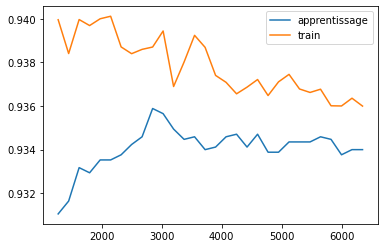

In [25]:
from sklearn.model_selection import learning_curve

N , train_score , val_score = learning_curve(model , X_train , y_train , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [26]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [36]:
pred = model.predict(X_test)

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       260
           1       1.00      1.00      1.00       121
           2       0.96      0.95      0.96       321
           3       0.87      0.76      0.81       104
           4       0.97      0.96      0.96       388
           5       0.96      0.96      0.96       386
           6       0.92      0.95      0.93       538

    accuracy                           0.95      2118
   macro avg       0.95      0.93      0.94      2118
weighted avg       0.95      0.95      0.95      2118

